## Motivation of the next step

In [1]:
#Import of all pandas libraries and olympics csv, filter of summer olympics and bronze, silver and gold datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
athlete = pd.read_csv('athlete_events.csv')
summer=athlete[athlete['Season'] == 'Summer']
summer_gold_winners=summer[summer['Medal']=='Gold']
summer_silver_winners=summer[summer['Medal']=='Silver']
summer_bronze_winners=summer[summer['Medal']=='Bronze']

In [2]:
#Sort of countries by bronze medals
bronze = (
    summer_bronze_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)

)

bronze=bronze.rename(columns = {'Event':'Bronze'})

medals_guia = bronze.drop('Bronze',axis=1)

In [3]:
#Sort of countries by silver medals
silver=(
    summer_silver_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)
)

silver=silver.rename(columns = {'Event':'Silver'})

keys = list(medals_guia.columns.values)
i1 = silver.set_index(keys).index
i2 = medals_guia.set_index(keys).index
silver_guia=silver[i1.isin(i2)]
silver_guia=silver_guia.reset_index(drop=True)

In [4]:
#Sort of countries by gold medals
gold = (
    summer_gold_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)
)

gold=gold.rename(columns = {'Event':'Gold'})

keys = list(medals_guia.columns.values)
i1 = gold.set_index(keys).index
i2 = medals_guia.set_index(keys).index
gold_guia=gold[i1.isin(i2)]
gold_guia=gold_guia.reset_index(drop=True)

In [5]:
#Historic Olympic medal table
medallero=(
    bronze
    .merge(silver_guia,on=['Year','NOC'],how='outer')
    .fillna(0)
    .merge(gold_guia,on=['Year','NOC'],how='outer')
    .fillna(0)
    .sort_values(by=['Year','Gold','Silver','Bronze'],ascending=False)
)

cols = ['Year','NOC','Gold','Silver','Bronze']
medallero=medallero[cols]
medallero=medallero.reset_index(drop=True)

medallero['Silver']=medallero['Silver'].astype(int)
medallero['Gold']=medallero['Gold'].astype(int)

years=(
    medallero['Year']
    .unique()
)

#Final medal table with olympic rankings
arr_df_aux=[]
for year in years:
    df_aux= medallero[medallero['Year']==year].copy()
    valor=np.arange(1,len(df_aux)+1)
    df_aux['Ranking']=valor
    arr_df_aux.append(df_aux)


medallero_verano_ranking=pd.concat(arr_df_aux)

In [6]:
#All countries keys that have had participated in the summer olympics
countries = medallero_verano_ranking['NOC'].unique()

In [7]:
#List of all the years that the summer olympics had been held
years_lst=list(years)
years_aux= []
for x in reversed(years_lst):
    years_aux.append(x)
years_lst=years_aux

rankings_hist=[]

#Historic ranking or performance of all countries (All NOC keys)
for pais in countries:
    df_aux=medallero_verano_ranking[medallero_verano_ranking['NOC']==pais].loc[:,['Year','Ranking']]

    years_aux=list(df_aux['Year'])
    lista_aux=[]
    for year in years_lst:
        if(year in years_aux):
            valor=df_aux.loc[df_aux['Year'] == year]['Ranking'].iloc[0]
            lista_aux.append(valor)
        else:
            lista_aux.append(0)
    aux=(pais,lista_aux)
    rankings_hist.append(aux)

In [8]:
#DataFrame of all the final positions of all countries that have had participated at 
#least one time in the summer olympics, the index is the country, and each columns is an olympic game
pd_aux=pd.DataFrame(rankings_hist)
pd_aux.columns=['Country','Positions']
pd_aux
ranking_countries=pd.DataFrame(pd_aux.Positions.values.tolist(),index=pd_aux.iloc[:,0],columns=list(reversed(years)))

In [9]:
ranking_countries

,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Country,,,,,,,,,,,,,,,,,,,,,
USA,1,2,1,2,2,1,1,1,1,1,...,0,1,3,2,1,1,1,2,1,1
GBR,5,3,0,4,1,3,5,4,9,9,...,9,11,12,13,34,10,10,4,3,2
CHN,0,0,0,0,0,0,0,0,0,0,...,0,4,11,4,4,3,2,1,2,3
RUS,0,0,0,0,0,15,0,0,0,0,...,0,0,0,0,2,2,3,3,4,4
GER,3,6,2,6,5,6,0,0,2,7,...,0,0,0,3,3,5,6,5,6,5
JPN,0,0,0,0,0,0,0,23,15,5,...,0,7,14,17,21,15,5,8,11,6
FRA,4,1,0,1,4,5,8,2,5,3,...,8,12,9,9,5,6,7,10,7,7
KOR,0,0,0,0,0,0,0,0,0,0,...,0,10,4,7,10,12,9,7,5,8
ITA,0,0,0,5,0,7,6,5,7,2,...,5,5,10,12,6,7,8,9,8,9


In [10]:
#Read gdp csv
gdp = pd.read_csv('GDP.csv')

In [11]:
#Read hdi csv
hdi = pd.read_csv('HDI.csv',encoding='iso-8859-1')

In [12]:
#Read gini index csv
gini = pd.read_csv('GINI.csv',encoding='iso-8859-1')

In [14]:
#Read population csv
poblacion = pd.read_csv('Population.csv')

In [15]:
#clear gdp dataframe
gdp.drop(['Indicator Name','Indicator Code'],axis = 1,inplace=True)

In [16]:
#Extract France info
Fra_gdp = gdp[gdp['Country Code']=='FRA']

In [17]:
#Set FRA as index 
Fra_gdp.index = ['FRA']

In [18]:
Fra_gdp.drop(['Country Name','Country Code'],axis = 1,inplace= True)

/Users/gabrielreynoso/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
Fra_gdp

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
FRA,6.265147e+10,6.834674e+10,7.631378e+10,8.555111e+10,9.490659e+10,1.021610e+11,1.105970e+11,1.194660e+11,1.298470e+11,1.407250e+11,...,2.918380e+12,2.690220e+12,2.642610e+12,2.861410e+12,2.683830e+12,2.811080e+12,2.852170e+12,2.438210e+12,2.465130e+12,2.582500e+12


In [20]:
#Convert the dataframe to a list of values
years_Fra_gdp = list(Fra_gdp.columns)

values_Fra_gdp = Fra_gdp.values[0]

In [21]:
#Calculate the variation of gdp through different years
incre_Fra_gdp=[]

for i in range(0,len(values_Fra_gdp)-1):
    aux = values_Fra_gdp[i+1]-values_Fra_gdp[i]
    incre_Fra_gdp.append(aux)

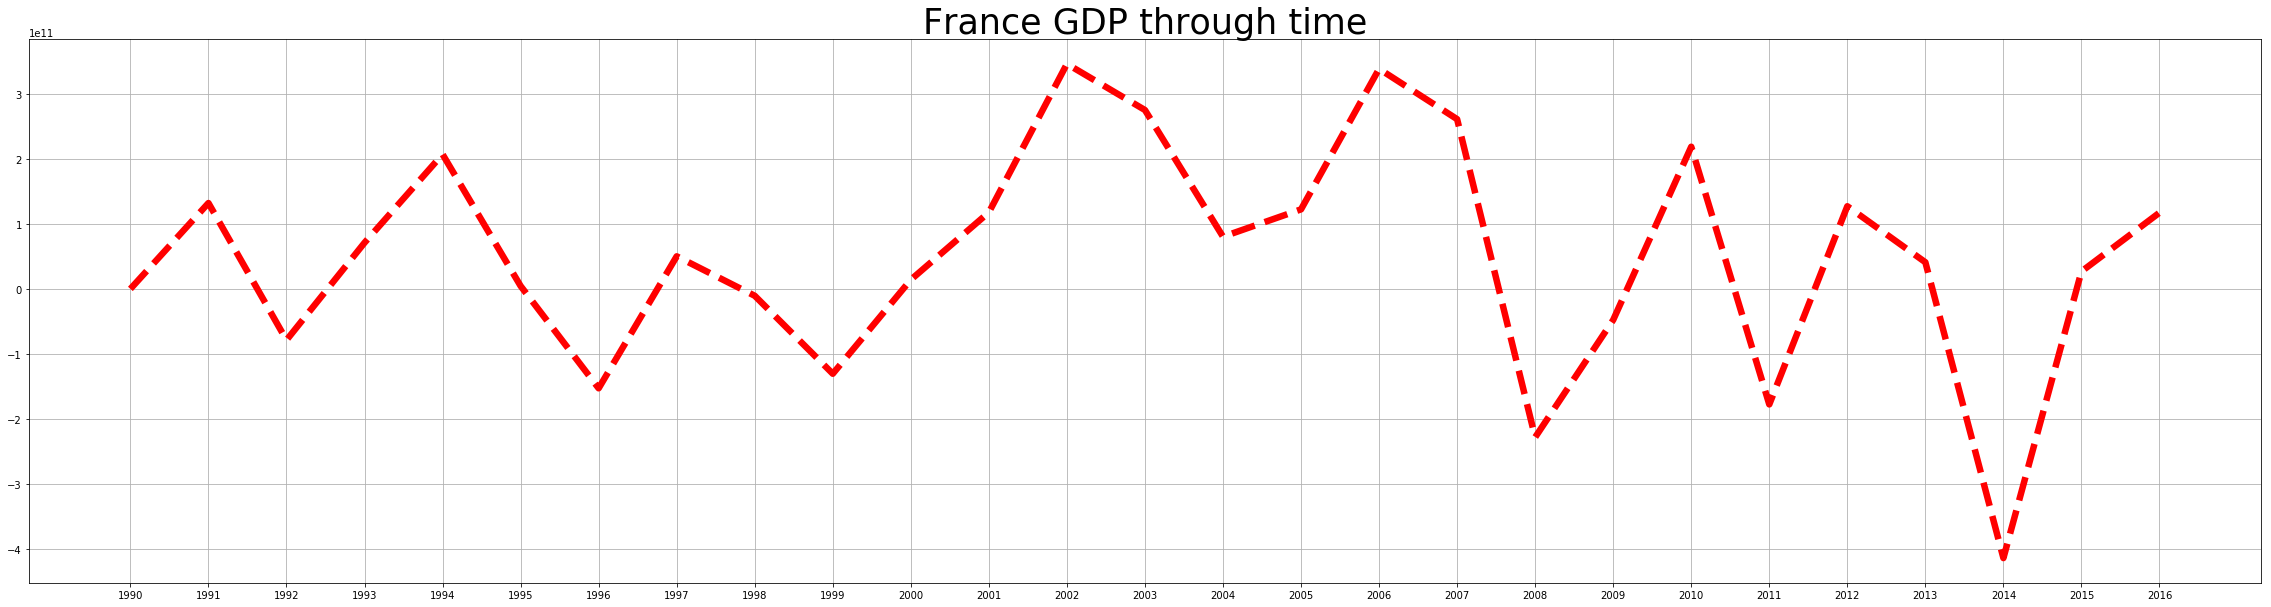

In [23]:
#Plot variation of France gdp through time
plt.figure(figsize=(40,10))

plt.plot(years_Fra_gdp[30:57],incre_Fra_gdp[30:58],'--',color='red',linewidth=6.5)
plt.xticks(years_Fra_gdp[30:57])
plt.grid(True)
plt.title('France GDP through time',fontsize= 35)
plt.show()

In [24]:
#Extract HDI of France
Fra_hdi=hdi[hdi['Country']==' France']
Fra_hdi.index=['Fra']

In [25]:
Fra_hdi.drop(['Country','HDI Rank (2015)'],axis = 1, inplace =True)

/Users/gabrielreynoso/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
#List with all the values of HDI of France through time
years_Fra_hdi = list(Fra_hdi.columns)

values_Fra_hdi = Fra_hdi.values[0]

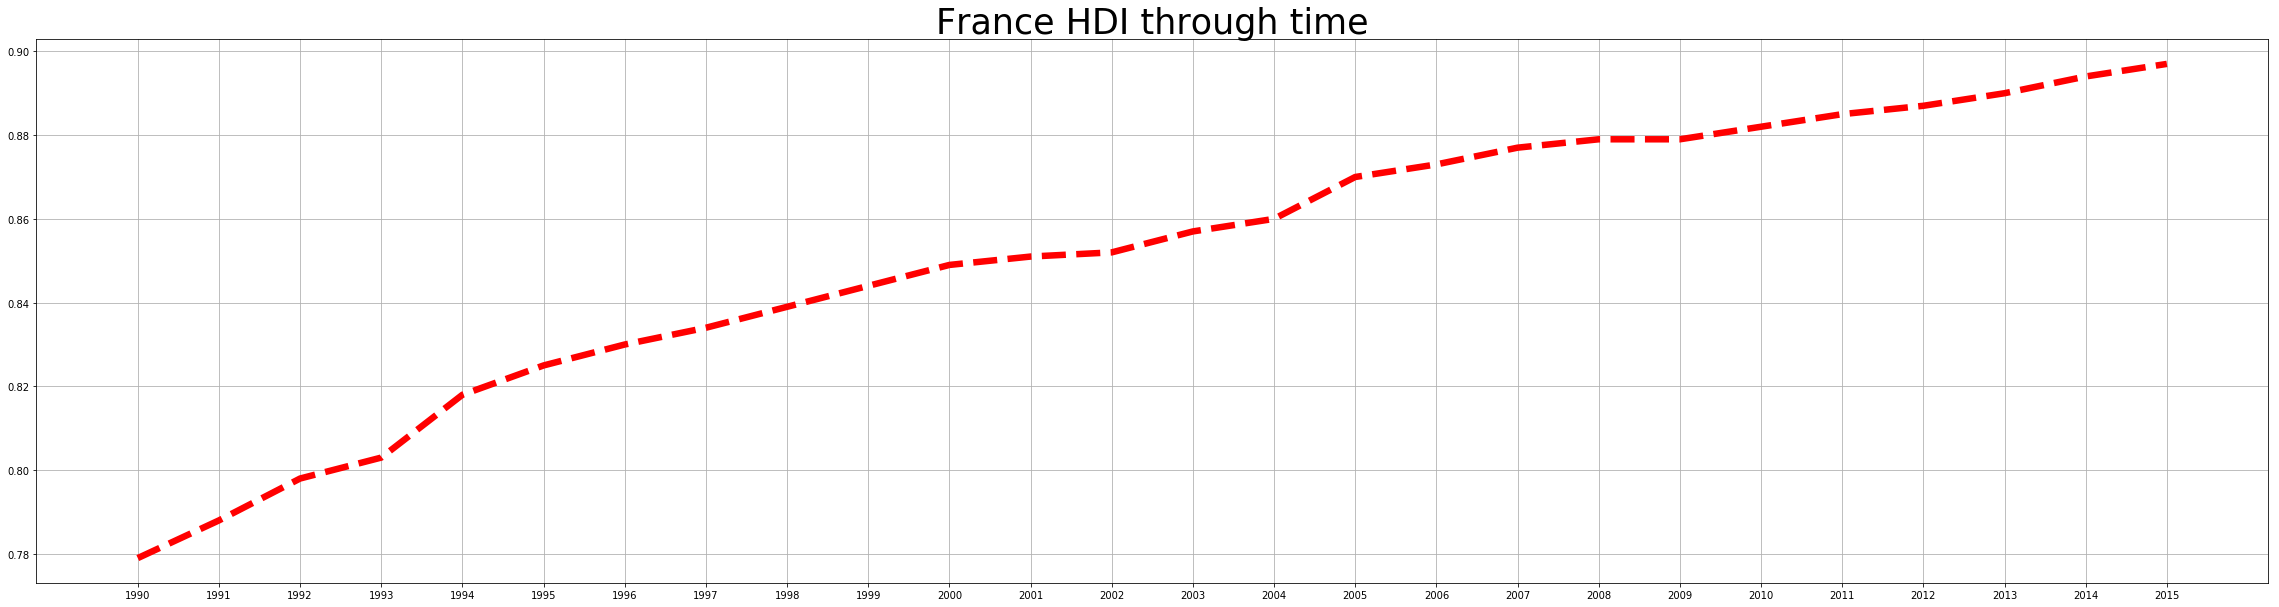

In [27]:
#France HDI Index
plt.figure(figsize=(40,10))

plt.plot(years_Fra_hdi,values_Fra_hdi,'--',color='red',linewidth=6.5)
plt.xticks(years_Fra_hdi)
plt.grid(True)
plt.title('France HDI through time',fontsize= 35)
plt.show()

In [30]:
#Extract the gini index values of France of the Dataframe
Fra_gini = gini[gini['Country Code'] == 'FRA']

In [31]:
Fra_gini.index=['FRA']

In [32]:
Fra_gini.drop(['Country Name','Country Code', 'Indicator Name','Indicator Code'],axis = 1, inplace= True)

/Users/gabrielreynoso/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
Fra_gini.drop(['Unnamed: 60','Unnamed: 61'],axis = 1, inplace= True)

/Users/gabrielreynoso/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
#List of the values of France gini index through time
years_Fra_gini = list(Fra_gini.columns)

values_Fra_gini = Fra_gini.values[0]

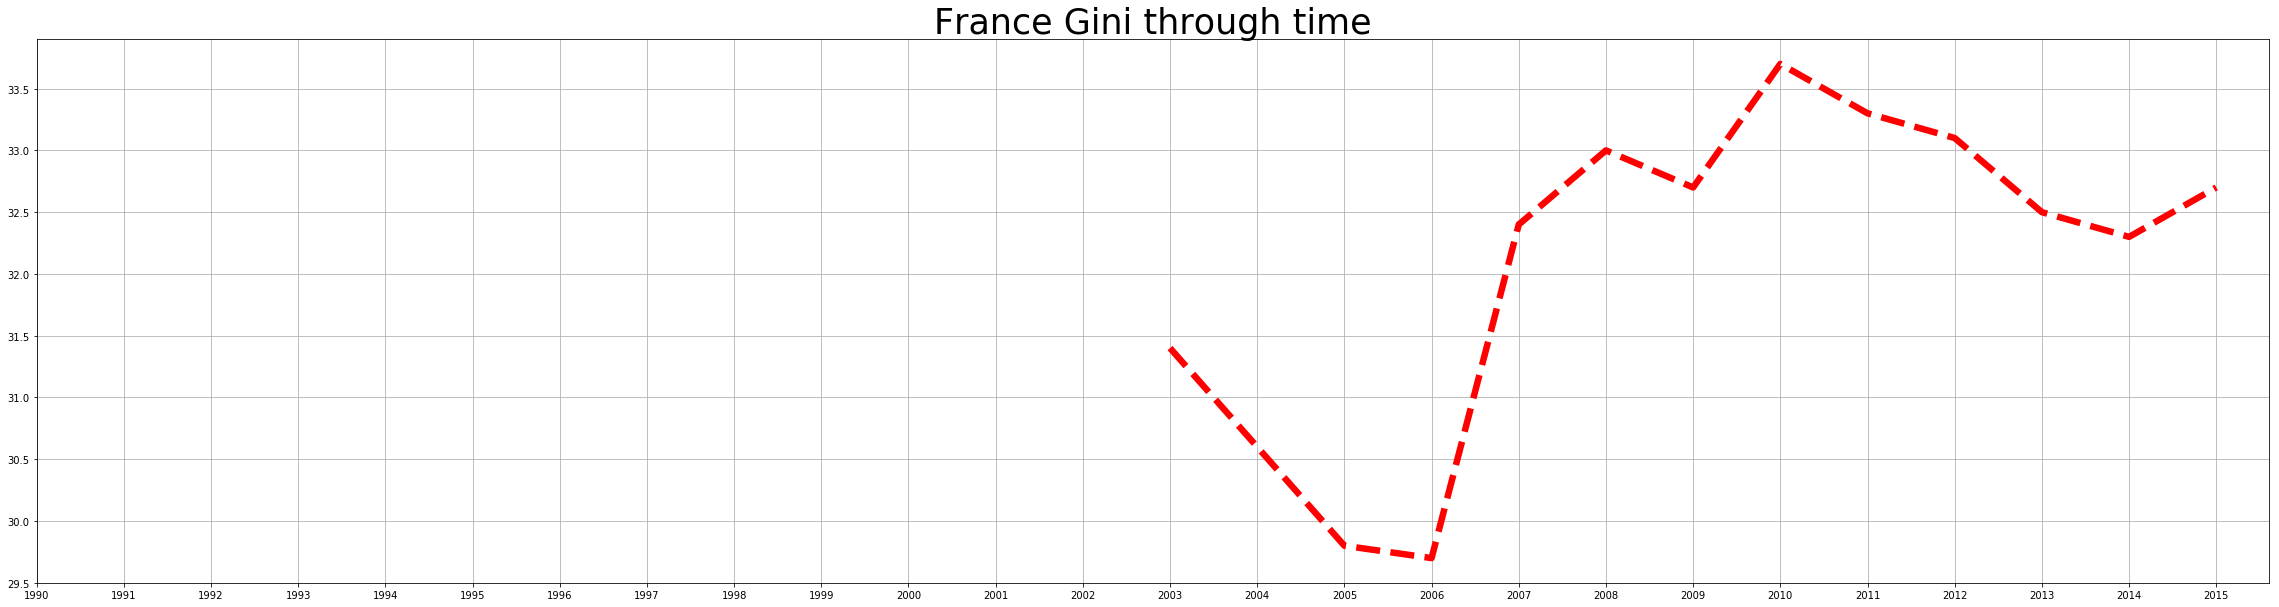

In [35]:
#France gini index through time
plt.figure(figsize=(40,10))

plt.plot(years_Fra_gini[30:],values_Fra_gini[30:],'--',color='red',linewidth=6.5)
plt.xticks(years_Fra_gini[30:])
plt.grid(True)
plt.title('France Gini through time',fontsize= 35)
plt.show()

In [38]:
ranking_countries=ranking_countries.reset_index()

In [39]:
#Extract all France final position in the medal table through time
Fra_rank = ranking_countries[ranking_countries['Country']=='FRA']

In [40]:
Fra_rank.index=['FRA']

In [41]:
Fra_rank.drop('Country',axis = 1, inplace = True)

/Users/gabrielreynoso/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [42]:
Fra_rank

,index,1896,1900,1904,1906,1908,1912,1920,1924,1928,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
FRA,6,4,1,0,1,4,5,8,2,5,...,8,12,9,9,5,6,7,10,7,7


In [43]:
years_Fra_rank = list(Fra_rank.columns)

values_Fra_rank = Fra_rank.values[0]

In [44]:
years_Fra_rank[21:]

[1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]

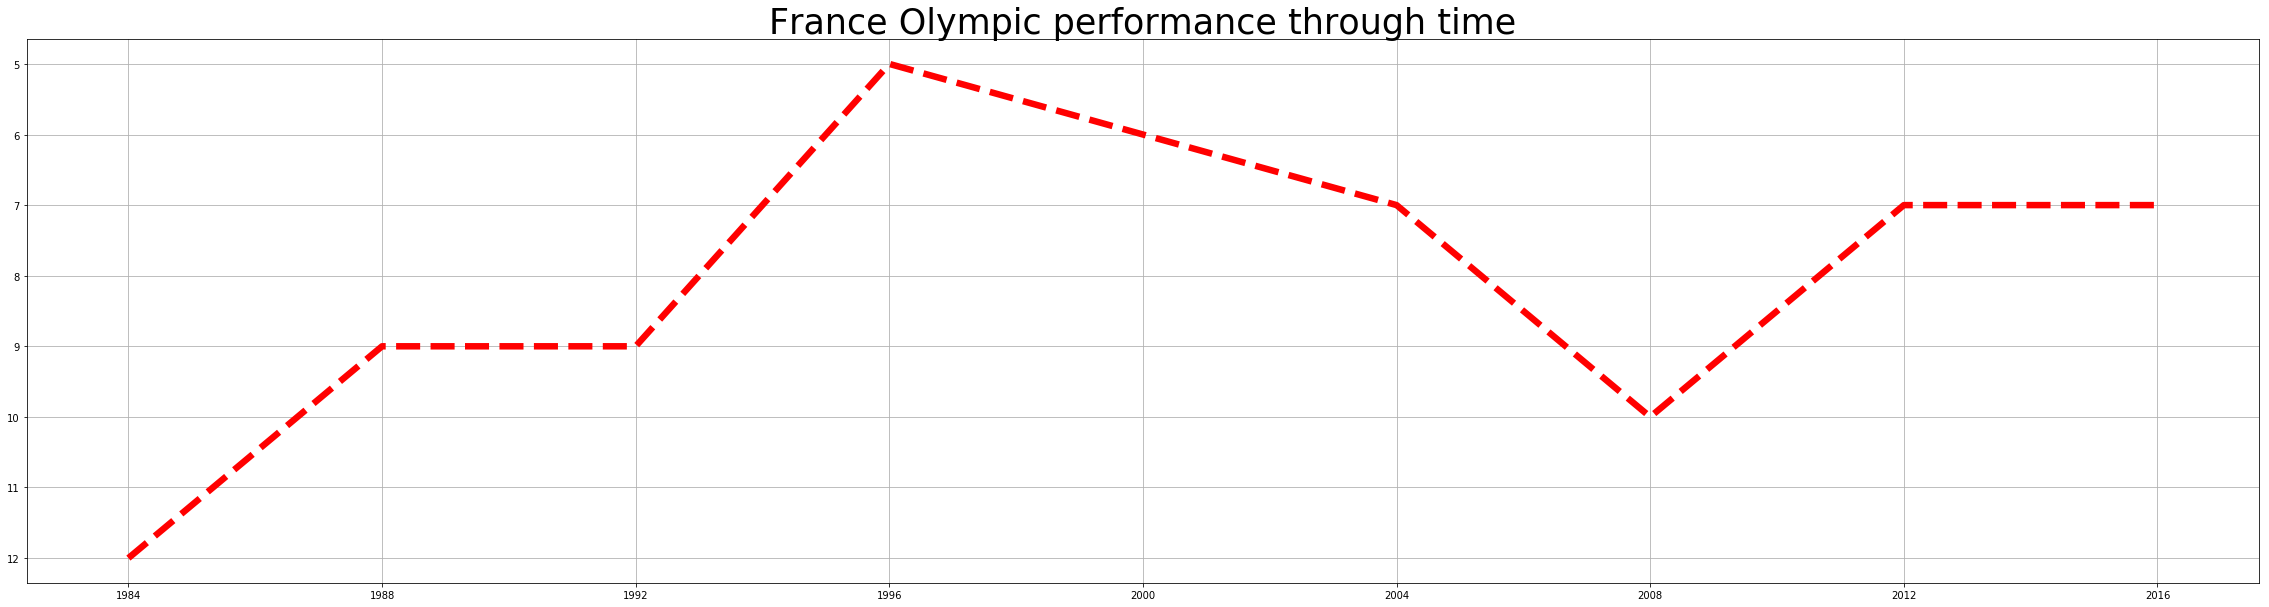

In [45]:
#France olympic performance through time, since 198
plt.figure(figsize=(40,10))

plt.plot(years_Fra_rank[21:],values_Fra_rank[21:],'--',color='red',linewidth=6.5)
plt.xticks(years_Fra_rank[21:])
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('France Olympic performance through time',fontsize= 35)
plt.show()

In [46]:
values_Fra_gini[30:43] = 0

In [47]:
values_Fra_gini[30:]

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. , 31.4, 30.6, 29.8, 29.7, 32.4, 33. , 32.7, 33.7, 33.3,
       33.1, 32.5, 32.3, 32.7])

Text(0.5,0.98,'France Regression Analysis Motivation')

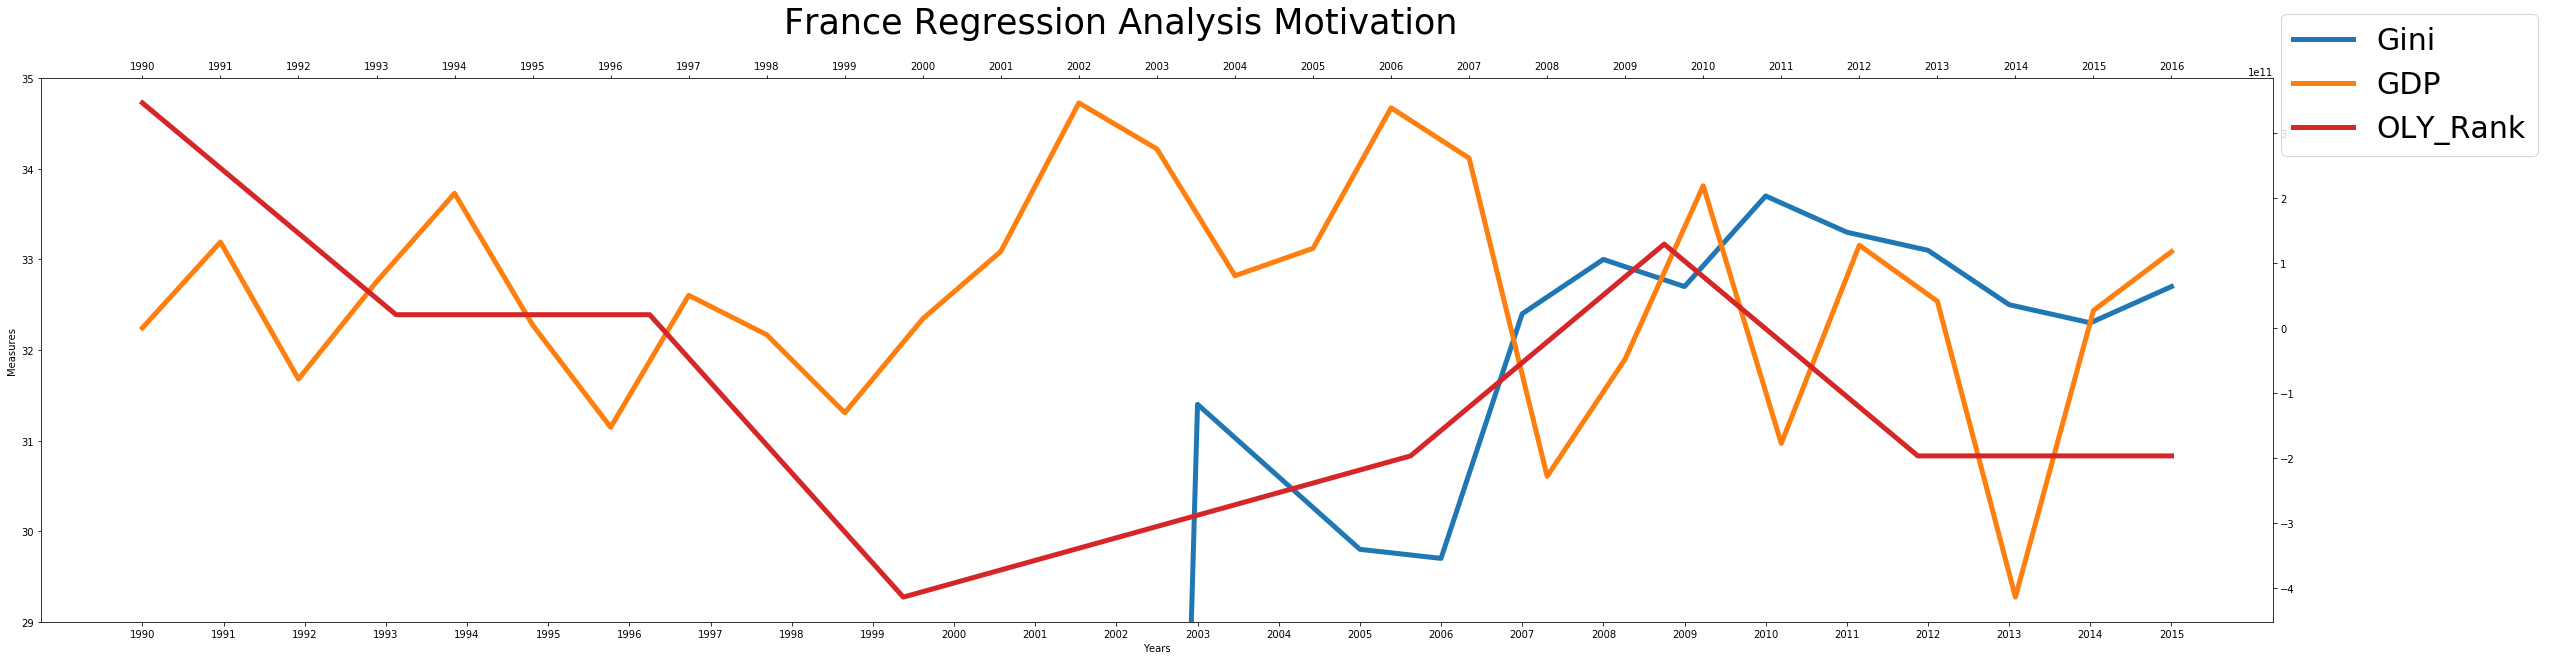

In [48]:
#PLOT COMBINING GINI INDEX, HDI, AND OLYMPIC PERFORMANCE OF FRANCE SINCE 1988
fig=plt.figure( figsize=(40,10))
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

gini_graph,= ax.plot(years_Fra_gini[30:], values_Fra_gini[30:], color="C0",linewidth=5.0)
ax.set_xlabel("Years")
ax.set_ylabel("Measures")
ax.set_ylim((29,35))

gdp_graph,=ax2.plot(years_Fra_gdp[30:57], incre_Fra_gdp[30:58], color="C1",linewidth=5.0)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()      

rank_graph,=ax3.plot(years_Fra_rank[21:], values_Fra_rank[21:], color="C3",linewidth=5.0)
ax3.set_xticks([])
ax3.set_yticks([])

fig.legend([gini_graph, gdp_graph, rank_graph],['Gini', 'GDP','OLY_Rank'],fontsize=30)
fig.suptitle('France Regression Analysis Motivation',fontsize= 35)


# ax4.plot(years_Fra_hdi, values_Fra_hdi, color="C4",linewidth=5.0)
# ax4.set_xticks([])
# ax4.set_yticks([])